In [21]:
import pandas as pd
import numpy as np

In [3]:
full_dataset = pd.read_csv(r'US_Accidents_Dec21_updated.csv')

In [4]:
print(full_dataset)

                ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        40.108910  -83.092860  40.11206

In [5]:
# Analyze values in column "Severity" (impact on traffic)
filtered_data = full_dataset[full_dataset["Severity"]==2]
print(filtered_data)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(full_dataset["Severity"].unique())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
# null values
print(full_dataset["Severity"].isnull().sum())

                ID  Severity           Start_Time             End_Time  \
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
5              A-6         2  2016-02-08 08:16:57  2016-02-08 14:16:57   
6              A-7         2  2016-02-08 08:15:41  2016-02-08 14:15:41   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
1         39.86542  -84.06280  39.86501  -8

In [6]:
all_types = full_dataset.dtypes
print(all_types)

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [11]:
# Analyze values in column "Start_Time"
# null values
print(full_dataset["Start_Time"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#conversion from object to datetime64[ns]
full_dataset["Start_Time"] = pd.to_datetime(full_dataset["Start_Time"])
print(full_dataset["Start_Time"])

0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]


In [12]:
# Analyze values in column "End_Time"
# null values
print(full_dataset["End_Time"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#conversion from object to datetime64[ns]
full_dataset["End_Time"] = pd.to_datetime(full_dataset["End_Time"])
print(full_dataset["End_Time"])

0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
0         2016-02-08 06:37:08
1         2016-02-08 11:56:20
2         2016-02-08 12:15:39
3         2016-02-08 12:51:45
4         2016-02-08 13:53:43
                  ...        
2845337   2019-08-23 18:32:01
2845338   2019-08-23 19:38:23
2845339   2019-08-23 19:28:49
2845340   2019-08-23 19:29:42
2845341   2019-08-23 19:21:31
Name: End_Time, Length: 2845342, dtype: datetime64[ns]



Difference of end time and start time :
 0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
2845337   0 days 00:28:36
2845338   0 days 00:26:53
2845339   0 days 00:28:28
2845340   0 days 00:29:21
2845341   0 days 00:29:25
Name: duration, Length: 2845342, dtype: timedelta64[ns]


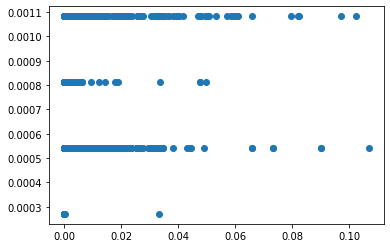

In [43]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
  


# create column incidents duration (difference between end time and start time)
full_dataset['duration'] = full_dataset['End_Time'] - full_dataset['Start_Time']
print("\nDifference of end time and start time :\n", full_dataset['duration'])

duration_normalized = preprocessing.normalize([np.array(full_dataset['duration'])])
severity_normalized = preprocessing.normalize([np.array(full_dataset['Severity'])])

  
plt.scatter(duration_normalized, severity_normalized)
plt.show()


In [14]:
# check null values for latitude and longitude
print("Null values for 'Start_Lat'",full_dataset["Start_Lat"].isnull().sum())
print("Null values for 'Start_Lng'",full_dataset["Start_Lng"].isnull().sum())
print("Null values for 'End_Lat'",full_dataset["End_Lat"].isnull().sum())
print("Null values for 'End_Lng'",full_dataset["End_Lng"].isnull().sum())

# convert latitude and longitude to another type??? --> check software behaviours!

Null values for 'Start_Lat' 0
Null values for 'Start_Lng' 0
Null values for 'End_Lat' 0
Null values for 'End_Lng' 0


Null values for 'Distance' 0


c:\Users\Anna\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


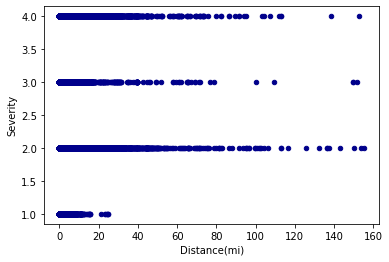

In [44]:
#!pip install matplotlib
#import matplotlib.pyplot as plt
#full_dataset.plot(x='ID', y='Severity')


# check null values for distance
print("Null values for 'Distance'",full_dataset["Distance(mi)"].isnull().sum())

ax2 = full_dataset.plot.scatter(x='Distance(mi)',y='Severity',c='DarkBlue')

In [45]:
# Analyze values in column "Number"
# null values
print("Null values: ")
print(full_dataset["Number"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

Null values: 
1743911
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [46]:
# Analyze values in column "Street"
# null values
print("Null values: ")
print(full_dataset["Street"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")


Null values: 
2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


In [47]:
# Analyze values in column "Side"
# null values
print("Null values: ")
print(full_dataset["Side"].isnull().sum())
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")

Null values: 
0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
